# Assignment 7, Group 10

This assigment studies the grain growth in metals during isothermal heat treatment. Isothermal treatment is illustated in the figure below: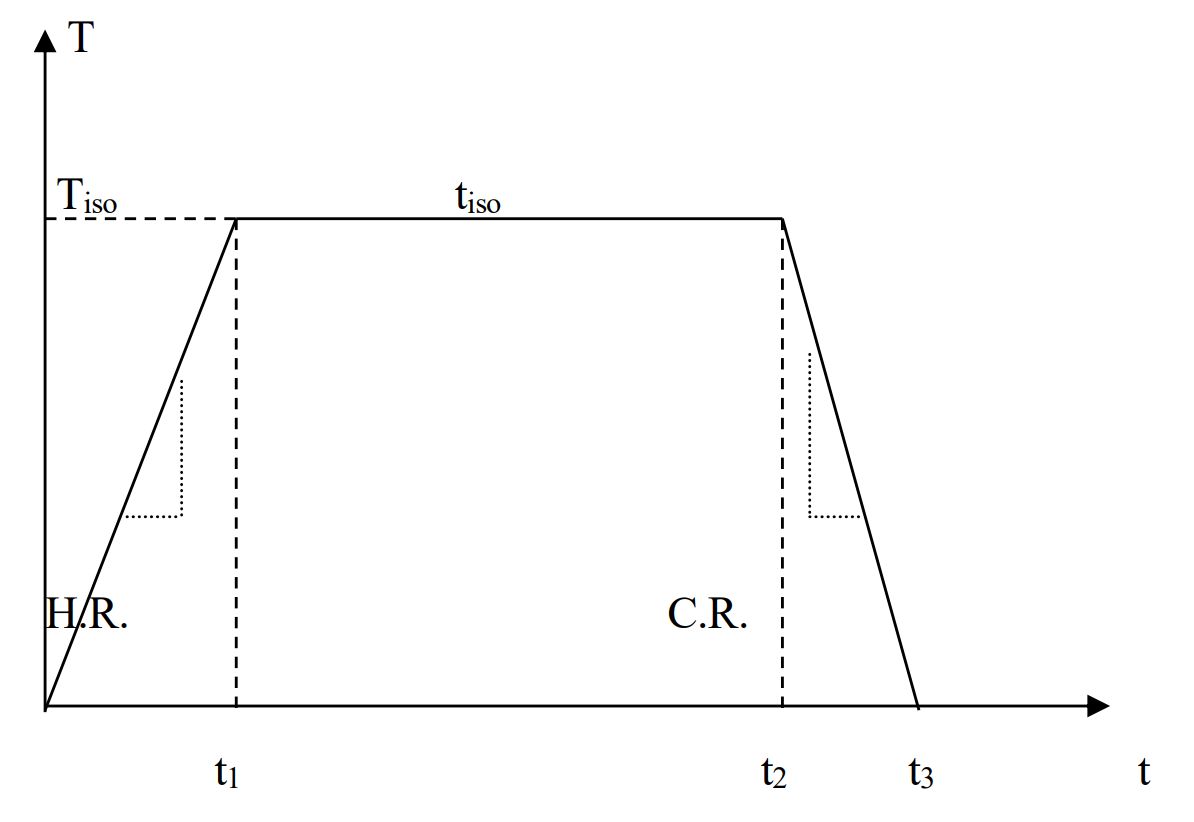

HR and CR are abbrivations for heating and cooling rate. The grain size, D, can be described by the following equation,

$$ D = (D_{0}^{\frac{1}{n}} + K_{0}\int_{0}^{t_{1}} exp(-\frac{Q}{RT(t)})dt + K_{0} exp(-\frac{Q}{RT_{iso}} t_{iso} + K_{0}\int_{t_{2}}^{t_{3}} exp(-\frac{Q}{RT(t)})dt)^{n} $$

where in our case 
<ul>
    <li> D<sub>0</sub> is initial grain size and equal to 20µm </li>
    <li> K<sub>0</sub> is kinetic constant for the material and equal to 10<sup>10</sup> µm<sup>2</sup>/s </li>
    <li> Q is the activation energy and equal to 221 kJ/mol </li>
    <li> n is the time exponent and equal to 0.5 </li>
    <li> R is the gas constant </li>
    <li> T<sub>iso</sub> and t<sub>iso</sub> is the temperature and time of the isotherm part of the heat treatment </li>
    <li> T is the temperature and t is the time </sup>

    
</ul>


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import ipywidgets as widgets
from IPython.display import display
from IPython.html.widgets import *
from IPython.display import clear_output
import pandas as pd


#Constants
D0 = 20 #[µm]
K0 = 10**10 #[µm^2/s]
n = 0.5 
Q = 221000 #[J/mol]
R = 8.314 #[J/Kmol]

## Functions for calculating grain size

In [2]:
def dt(Tiso, rate):
    return (Tiso-298)/(100*rate)

def integralHR(Tiso, rate):
    integral = 0
    T_HR = np.linspace(298, Tiso, 100)
    for T in T_HR:
        integral += (np.exp(-Q/(R*T)))*dt(Tiso, rate)
    return integral #et tall, varierer mhp HR

def iso(Tiso, tiso):
    return np.exp(-Q/(R*Tiso))*tiso

def integralCR(Tiso, rate):
    integral = 0
    T_CR = np.linspace(Tiso, 298, 100)
    for T in T_CR:
        integral += np.exp(-Q/(R*T))*dt(Tiso, rate)
    return integral #et tall, varierer mhp CR

def grain(Tiso, tiso, CR, HR):
    return (D0**(1/n)+K0*(integralHR(Tiso, HR)+iso(Tiso, tiso)+integralCR(Tiso, CR)))**(n)

## Functions for plotting

In [3]:
def HRplot(Tiso, tiso, CR):
    HR = np.linspace(0.1, 2, 100)
    D = []
    for i in range(len(HR)):
        D.append(grain(Tiso, tiso, CR, HR[i]))
    
    plt.plot(HR, D)
    plt.title('Grain size as a function of heat rate')
    plt.xlabel('Heat rate [K/s]')
    plt.ylabel('Grain size [µm]')
    plt.grid()
    plt.show()
    
    HRt = np.arange(0.1, 2.1, 0.1)
    Dt = []
    for i in range(len(HRt)):
        Dt.append(round(grain(Tiso, tiso, CR, HRt[i]), 2))
        
    df = pd.DataFrame({
    'HR [K/s]': HRt,
    'Grain size [µm]': Dt, 
    })
    display(df)
    
    
def Tisoplot(tiso, HR, CR):
    Tiso = np.linspace(900+273, 1400+273, 100)
    D = []
    for i in range(len(Tiso)):
        D.append(grain(Tiso[i], tiso, CR, HR))
    
    plt.plot(Tiso, D)
    plt.title('Grain size as a function of T_iso')
    plt.xlabel('Isothermic temperature [K]')
    plt.ylabel('Grain size [µm]')
    plt.grid()
    plt.show()
    
    Tisot = np.around(np.linspace(900+273, 1400+273, 20), 2)
    Dt = []
    for i in range(len(Tisot)):
        Dt.append(round(grain(Tisot[i], tiso, CR, HR), 2))
    
    df = pd.DataFrame({
    'T_iso [K]': Tisot,
    'Grain size [µm]': Dt, 
    })
    display(df)
    

def tisoplot(Tiso, HR, CR):
    tiso = np.linspace(1, 100, 20)
    D = []
    for i in range(len(tiso)):
        D.append(grain(Tiso, tiso[i], CR, HR))
    
    plt.plot(tiso, D)
    plt.title('Grain size as a function of t_iso')
    plt.xlabel('Isothermic time [s]')
    plt.ylabel('Grain size [µm]')
    plt.grid()
    plt.show()
    
    tisot = np.around(np.linspace(1, 100, 20))
    Dt = []
    for i in range(len(tisot)):
        Dt.append(round(grain(Tiso, tisot[i], CR, HR), 2))
    
    df = pd.DataFrame({
    't_iso [K]': tisot,
    'Grain size [µm]': Dt, 
    })
    display(df)
        
    
def CRplot(Tiso, tiso, HR):
    CR = np.linspace(0.1, 2, 100)
    D = []
    for i in range(len(CR)):
        D.append(grain(Tiso, tiso, CR[i], HR))
    
    plt.plot(CR, D)
    plt.title('Grain size as a function of cooling rate')
    plt.xlabel('Cooling rate [K/s]')
    plt.ylabel('Grain size [µm]')
    plt.grid()
    plt.show()
    
    CRt = np.arange(0.1, 2.1, 0.1)
    Dt = []
    for i in range(len(CRt)):
        Dt.append(round(grain(Tiso, tiso, CRt[i], HR), 2))

    df = pd.DataFrame({
    'CR [K/s]': CRt,
    'Grain size [µm]': Dt, 
    })
    display(df)

## Interactive menu

In [4]:
def sub_task_chooser(sub):
    
    # Switch function
    if sub == 1: #plotting for heating rate
        widgets.interact(HRplot,HR=widgets.fixed(True), Tiso = Tisoslider, tiso = tisoslider, CR = CRslider)
        
        

    elif sub == 2: #plotting for site-saturation
        widgets.interact(Tisoplot, Tiso=widgets.fixed(True), HR = HRslider, tiso = tisoslider, CR = CRslider)
        

        
    elif sub == 3: #plotting for site-saturation with varying r
        widgets.interact(tisoplot, tiso=widgets.fixed(True), HR = HRslider, Tiso = Tisoslider, CR = CRslider)
        

    elif sub == 4:
        widgets.interact(CRplot, CR=widgets.fixed(True), Tiso = Tisoslider, tiso = tisoslider, HR = HRslider)
        

    
# Menu toggle buttons
sub_menu = widgets.ToggleButtons(
    #        {'names':corresponding values,}
    options={'Varying heating rate':1, 'Varying T_iso':2, 'Varying t_iso':3, 'Varying cooling rate':4},  
    value = 1,  #default value
    description='Model:',  #name
    button_style='primary',  #red buttons
)


CRslider = widgets.FloatSlider(value = 1.05, min = 0.1, max = 2, step = 0.01)
Tisoslider = widgets.IntSlider(value = 1150+273, min  = 900+273, max = 1400+273, step = 1)
tisoslider = widgets.IntSlider(value = 50, min = 1, max = 100, step = 1)
HRslider = widgets.FloatSlider(value = 1.05, min = 0.1, max = 2, step = 0.01)

widgets.interact(sub_task_chooser, sub=sub_menu)


interactive(children=(ToggleButtons(button_style='primary', description='Model:', options={'Varying heating ra…

<function __main__.sub_task_chooser(sub)>